In [60]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Data cleaning 

The following set of codes will be used to clean the data and perform necessary merges according the instruction.

In [16]:
def clean_and_merge(pupil_scores, pupil_attendance, school_info, lesson_completion):
    
    # import Pupil Scores
    df1 = pd.read_excel(pupil_scores)
    
    # Pivot subject column
    df_pupil = df1.pivot(index=['school_id', 'pupil_id', 'grade'], columns='subject', values='score').reset_index()
    
    
    
    # import Pupil Attendance
    df2 = pd.read_excel(pupil_attendance)
    
    # Merge pupil attendance to pupil_scores
    df_merged_att = pd.merge(df_pupil, df2, how='left', on=['pupil_id', 'school_id', 'grade'])
    
    
    
    # import School Info
    df3 = pd.read_excel(school_info)

    # Merge school_info to pupil_scores
    df_merged_sch = pd.merge(df_merged_att, df3, how='left', on='school_id')
    
    
    
    # import School Info
    df3 = pd.read_excel(school_info)

    # Merge school_info to pupil_scores
    df_merged_sch = pd.merge(df_merged_att, df3, how='left', on='school_id')
    
    
    # import Lesson Completion
    df4 = pd.read_excel(lesson_completion)

    # Merge school_info to pupil_scores
    df_merged_lesson = pd.merge(df_merged_sch, df4, how='left', on=['school_id', 'grade'])


    return df_merged_lesson

In [18]:
df_pupil = clean_and_merge(pupil_scores = "data/Pupil scores.xlsx",
                        pupil_attendance = "data/Pupil attendance.xlsx",
                       school_info = "data/School_information.xlsx",
                       lesson_completion= "data/Lesson completion.xlsx")
df_pupil.head()



,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,Kirinyaga,Central,No,202,0.680608
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,Kirinyaga,Central,No,202,0.680608
2,416,1430,Grade 1,20.0,0.171429,0.400000,85,65,Kirinyaga,Central,No,505,0.568401
3,416,1642,Grade 5,68.0,0.775000,0.680000,86,56,Kirinyaga,Central,No,145,0.396761
4,416,1980,Grade 1,40.0,0.457143,1.000000,85,74,Kirinyaga,Central,No,505,0.568401


In [162]:
df_pupil.to_csv("combined-pupils-data.csv", index=False)

In [10]:
print(f"Number of pupil with no Fluency Score: {df_pupils['Fluency'].isnull().value_counts()[True]}")
print(f"Number of pupil with no Kiswahili Score: {df_pupils['Kiswahili'].isnull().value_counts()[True]}")
print(f"Number of pupil with no Math Score: {df_pupils['Math'].isnull().value_counts()[True]}")


Number of pupil with no Fluency Score: 725
Number of pupil with no Kiswahili Score: 600
Number of pupil with no Math Score: 614


# Step 2: Calculating KPIs

To generate the necessary KPIs, the following questions will be answered :

1. What is the network-level average Percent Pupils Present? 
2. What is the school-level average Percent Pupils Present? 
3. How does the interpretation of the KPI change between the two approaches? Does it matter in this case? When would it matter, (i.e., when would one be more appropriate than the other?)

### 1. Network-level average Percent Pupils Present 

#### At the entire network level, the average percentage pupil present is given by:

In [32]:
print(round(sum(df_pupil['present_records']) / sum(df_pupil['attendance_records']) *100 , 2), "%")

75.78 %


an alternative pupil-level approach to calculating the average percentage pupil present is shown below:

In [46]:
df_pupil['pupil_percent_present'] = ((df_pupil['present_records']/
                                            df_pupil['attendance_records']) *100).round(2)

print(
    round(
    sum(df_pupil['pupil_percent_present']) / df_pupil.shape[0]
    , 2), "%"
)

75.93 %


In [ ]:
print(
    round(
    sum(df_pupil['pupil_percent_present']) / df_pupil.shape[0]
    , 2), "%"
)

### 2. School-level average Percent Pupils Present 

#### To first calculate the average at the school level (i.e., average for each school, a groupby will be performed on the school_id column):

In [48]:
df_school = df_pupil.groupby("school_id").agg({"attendance_records": np.sum, "present_records": np.sum})

df_school['sch_level_percent_present'] = ((df_school['present_records']/
                                            df_school['attendance_records']) *100)
print(df_school.shape)
df_school.head()

(111, 3)


,attendance_records,present_records,sch_level_percent_present
school_id,,,
416,6840,5198,75.994152
792,9491,7146,75.292382
5502,7873,5255,66.747110
7956,10750,8249,76.734884
8084,15679,10710,68.307928


In [50]:
# Overall  school-level average percentage pupil present
print(
    round(
    sum(df_school['sch_level_percent_present']) / df_school.shape[0]
    , 2), "%"
)

75.61 %


### 3. Comparing the two approaches above: 
"Network" vs. "School" level  average Percent Pupils Present 

From the above clculation, the overall average percent pupil present at the network level (75.78%) and at the school level (75.61%) are seen to be very close.

In this case, there seem to be no significant difference in the interpretation of the two average percentges given by the two approaches. However, this result could change dramatically depending on factors such as the number of pupils in each school, or lesson completion rate per school. 

In a case where there is a high imbalance in number of students per school, or the rate at which lessons are completed per school, then the Network-level approach will be more appropriate for calculating the average percent pupils present.

# Step 3: Descriptives

In this Step, the following will be analysed:

1. Average Fluency scores for each of the five grades.
2. Region with least and highest Fluency score across all grades.
3. Create a binary variable that is 1 if a given child reads at 10 or lower, and 0 otherwise. Create a bar chart with grades on the x-axis, and the share of pupils scoring under this threshold for each grade. 
4. What school has the highest share of pupils scoring under this threshold in grade 3?

#### 1. Average Fluency scores for each of the five grades.

In [158]:
df_pupil["Fluency"].describe()

count    11976.000000
mean       113.854041
std         71.972911
min          0.000000
25%         57.000000
50%        102.000000
75%        165.000000
max        383.000000
Name: Fluency, dtype: float64

In [54]:
df_grade = df_pupil.groupby("grade").agg({"Fluency": np.mean})
df_grade

,Fluency
grade,
Grade 1,53.084650
Grade 2,104.396565
Grade 3,127.391393
Grade 4,145.473339
Grade 5,154.934010


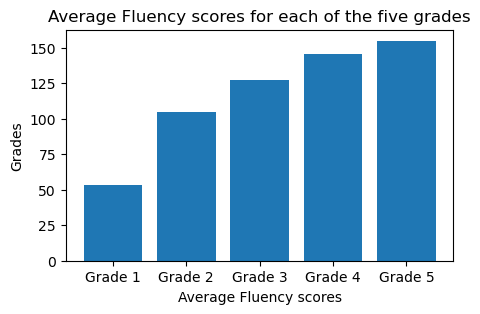

In [122]:
plt.figure(figsize=(5, 3))
plt.bar(x = df_grade.index, height = df_grade['Fluency'])

plt.title("Average Fluency scores for each of the five grades")
plt.xlabel("Average Fluency scores")
plt.ylabel("Grades");

#### 2.  Regions with lowest and highest average Fluency scores.

In [106]:
df_region = df_pupil.groupby("region").agg({"Fluency": np.mean}).sort_values(by = "Fluency")
print(df_region.shape)
print(df_region.iloc[0])
df_region.iloc[-1]

(31, 1)
Fluency    60.313953
Name: Kirinyaga, dtype: float64


Fluency    157.763636
Name: Machakos, dtype: float64

In [108]:
print(df_region.idxmin())
df_region.idxmax() 

Fluency    Kirinyaga
dtype: object


Fluency    Machakos
dtype: object

As shown above, the region with the lowest and highest average Fluency scores are Kirinyaga ( 60.31) and Machakos (157.76) respectively

#### 3.  Binary encoding for Fluency grades (1: <= 10, 0: > 10).

In [159]:
threshold = 10
df_pupil["Fluency_encoding"] = df_pupil["Fluency"].apply(lambda x: 1 if x <= threshold else 0)
print(df_pupil["Fluency_encoding"].sum())
df_pupil.head(2)

495


,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate,pupil_percent_present,Fluency_encoding
0,416,344,Grade 2,41.0,0.6,0.466667,85,77,Kirinyaga,Central,No,202,0.680608,90.59,0
1,416,354,Grade 2,47.0,0.8,0.633333,102,90,Kirinyaga,Central,No,202,0.680608,88.24,0


In [161]:
df_grade_under_threshold = df_pupil.groupby("grade").agg({"Fluency_encoding": np.sum})
df_grade_under_threshold

,Fluency_encoding
grade,
Grade 1,294
Grade 2,90
Grade 3,55
Grade 4,38
Grade 5,18


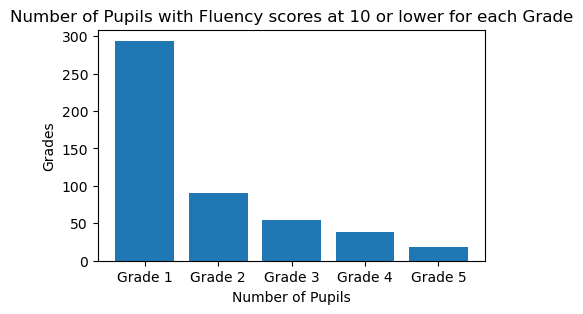

In [125]:
plt.figure(figsize=(5, 3))
plt.bar(x = df_grade_under_threshold.index, height = df_grade_under_threshold['Fluency_encoding'])

plt.title("Number of Pupils with Fluency scores at 10 or lower for each Grade")
plt.xlabel("Number of Pupils")
plt.ylabel("Grades");

#### 4. School with the highest share of pupils scoring under threshold in grade 3

In [131]:
df_pupil_under_threshold = df_pupil[df_pupil["Fluency_encoding"] == 1]


df_grade3_pupil_under_threshold = df_pupil_under_threshold[df_pupil_under_threshold["grade"] == "Grade 3"]
df_grade3_pupil_under_threshold

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate,pupil_percent_present,Fluency_encoding
9,416,3950,Grade 3,0.0,0.000000,0.000000,1,0,Kirinyaga,Central,No,124,0.250460,0.00,1
77,416,24781,Grade 3,2.0,0.000000,0.000000,61,49,Kirinyaga,Central,No,124,0.250460,80.33,1
467,8084,6380,Grade 3,0.0,0.028571,0.233333,105,49,Kajiado,Rift Valley,No,395,0.771639,46.67,1
522,8084,14228,Grade 3,0.0,0.171429,0.033333,105,84,Kajiado,Rift Valley,No,395,0.771639,80.00,1
532,8084,15306,Grade 3,2.0,0.085714,0.466667,105,44,Kajiado,Rift Valley,No,395,0.771639,41.90,1
1435,25263,17119,Grade 3,1.0,0.971429,0.366667,91,71,Mombasa,Coast,No,274,0.823204,78.02,1
1695,28860,12395,Grade 3,0.0,0.057143,0.033333,99,80,Nairobi,Nairobi,No,209,0.824074,80.81,1
1743,28860,21122,Grade 3,0.0,0.285714,0.066667,99,41,Nairobi,Nairobi,No,209,0.824074,41.41,1
1825,30690,8119,Grade 3,10.0,0.200000,0.233333,75,48,Isiolo,Eastern,No,125,0.375691,64.00,1
2571,39078,7422,Grade 3,10.0,0.171429,0.400000,79,73,Kwale,Coast,No,66,0.775322,92.41,1


In [147]:
df_grade3_school_under_threshold = (
    df_grade3_pupil_under_threshold.groupby("school_id")
    .agg({"Fluency_encoding": np.sum})
    .sort_values(by = "Fluency_encoding", ascending = False))
df_grade3_school_under_threshold

,Fluency_encoding
school_id,
223941,13
206948,5
46528,4
8084,3
607904,3
491645,3
416,2
583940,2
218688,2


In [141]:
df_grade3_school_under_threshold.iloc[0]

Fluency_encoding    13
Name: 223941, dtype: int64

In [150]:
df_school_223941_grade3 = df_pupil[(df_pupil["school_id"] == 223941) & (df_pupil["grade"] == "Grade 3")]
print(df_school_223941_grade3.shape)
df_school_223941.head()

(41, 15)


,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,region,province,tutoring_program,teacher_id,lesson_completion_rate,pupil_percent_present,Fluency_encoding
6162,223941,144,Grade 3,150.0,0.342857,0.333333,74,58,Eastern,Eastern,No,521,0.417515,78.38,0
6163,223941,292,Grade 3,10.0,0.085714,0.333333,74,60,Eastern,Eastern,No,521,0.417515,81.08,1
6167,223941,1144,Grade 3,120.0,0.571429,0.100000,57,39,Eastern,Eastern,No,521,0.417515,68.42,0
6180,223941,3108,Grade 3,225.0,0.771429,0.333333,74,63,Eastern,Eastern,No,521,0.417515,85.14,0
6184,223941,3890,Grade 3,10.0,0.142857,0.166667,74,49,Eastern,Eastern,No,521,0.417515,66.22,1


In [153]:
df_school_223941 = df_pupil[(df_pupil["school_id"] == 223941)]
print(df_school_223941['grade'].value_counts().sum())
df_school_223941['grade'].value_counts()

197


Grade 4    50
Grade 2    44
Grade 3    41
Grade 1    35
Grade 5    27
Name: grade, dtype: int64

As shown above, for Grade 3, the school with the highest number of pupils scoring under the Fluency threshold score is the school with `school_id` of `223941`.

Additional data shows that of the 41 Grade 3 pupils recorded for the school, 13 of them had a Fluency score <= 10.

Also, the school is under the "Eastern region" of the "Eastern province" and has "No tutoring program". It also has a total of 197 pupils across

# Step 4: Writing a Memo

A memo on "pupil scores" based on results from step 3.

#### Aim 
The focus of this memo is to provide some analysis of the Fluency score of pupils across the network over the given period.

#### Observations
1. Through an in-depth analysis of missing pupils' scores, the following was observed:

       a. 725 pupils had no Fluency Scores recorded
       b. 600 pupils had no Kiswahili Scores recorded
       c. 614 pupils had no Math Scores recorded
   
2. An overall statistical analysis of the Fluency Score shows that:   

       a. Overall average Fluency Score: 113.85
       b. minimum Fluency Score: 0.00
       c. 25% Fluency Score: 57.00
       d. 50% (median) Fluency Score: 102.00
       e. 75% Fluency Score: 165.00
       f. maximum Fluency Score: 383.00
   
3. Analysis of the lower and higher average Fluency scores across Grade classes shows the following:
  
       a. The 1st Graders (Grade 1) had the lowest average Fluency score (53.08). This is much lower than the overall average of 113.85 
       b. The 5th graders (Grade 5) had the highest average Fluency score (154.93). This is significantly higher than the overall average of 113.85
   
4. Analysis of the lower and higher average Fluency scores across regions shows the following:
   
       a. The Kirinyaga region had the highest average Fluency score of 60.31. This is lower than the overall average of 113.85
       b. The Machakos region had the highest average Fluency score of 157.76. This is higher than the overall average of 113.85
   
   
5. The following results were found for Fluency scores of 10.0 or lower
     
       a. A total of 495 pupils had a Fluency score of 10 or lower
       b. The 1st Graders (Grade 1) had the highest number of pupils scoring below the threshold (294 pupils)
       c. The 5th Graders (Grade 5) had the lowest number of pupils scoring below the threshold (18 pupils)
       d. The school with the ID of 223941 had the highest number of 3rd Graders (Grade 3) with Fluency scores below the threshold (13 pupils)
   
   
#### Conclusion

The above is a summary of the scores, particularly the Fluency scores, for pupils across Regions and Grades with more analysis on the lowest Fluency scorers in the 3rd Grade.